In [7]:
import requests
from bs4 import BeautifulSoup
myBaseUrl = "https://www.amazon.com/PROVALE-Regulating-Drinking-Cup-5cc/product-reviews/B000NKGGGO/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber="
# for different product change this base url, should end with page number = 
start_urls = []
for i in range(1, 22): # for different product change second number in range to number of review pages + 1
    start_urls.append(myBaseUrl + str(i))

HEADERS = {
    'authority': 'fls-na.amazon.com',
'method' : 'GET',
'path' : '/1/batch/1/OP/ATVPDKIKX0DER:139-0997389-0276609:NQWXHVBY6MCGZ6ZFM91Q$uedata=s:%2Frd%2Fuedata%3Fat%26v%3D0.215337.0%26id%3DNQWXHVBY6MCGZ6ZFM91Q%26ctb%3D1%26m%3D1%26sc%3DNQWXHVBY6MCGZ6ZFM91Q%26pc%3D1452%26at%3D1452%26t%3D1612360136843%26pty%3DCustomerReviews%26spty%3DremoteProduct%26pti%3DB000NKGGGO%26tid%3DHPZXB0930WXTM9QYEJQV%26aftb%3D1%26ui%3D2:1453',
'scheme' : 'https',
'accept':'*/*',
'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.104 Safari/537.36'
    
}
response = []
for i in start_urls:
    response.append(requests.get(i,headers=HEADERS))

In [8]:
print(response) #response 200 means success

[<Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>]


In [18]:
#collects soup data
soups = []
for i in response:
    soups.append(BeautifulSoup(i.content))
    
#collects and cleans review data
reviews = []
for soup in soups:
    review = soup.findAll("span",{'class':"a-size-base review-text review-text-content"})
    for i in review:
        reviews.append(i.text)
strippedreviews = []
for review in reviews:
    strippedreviews.append(review.strip())

In [24]:
soups[20]

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a

In [27]:
finalstars = []
for soup in soups:
    star = soup.findAll(attrs = {'data-hook':"review-star-rating"})
    for i in star: 
        finalstars.append(i.text)
    international = soup.findAll(attrs = {'data-hook':"cmps-review-star-rating"})
    for j in international:
        finalstars.append(j.text)

In [30]:
#collects and cleans title data 
titles = []
for soup in soups:
    title = soup.findAll("a",{'class':"a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold"})
    for i in title:
        titles.append(i.text)
    international = soup.findAll("span", {'class': "a-size-base review-title a-color-base review-title-content a-text-bold"})
    for j in international:
        titles.append(j.text)
strippedtitles = []
for title in titles:
    strippedtitles.append(title.strip())

In [31]:
#creates a csv file with title and review data 
import pandas as pd    

df = pd.DataFrame(strippedtitles, columns=["title"])   
df.to_csv('soupprovale.csv', index=False)  #change name of csv file as needed 
read = pd.read_csv("soupprovale.csv")
read["review"] = strippedreviews
read.to_csv("soupprovale.csv", index=False)
read["star"] = finalstars
read.to_csv("soupprovale.csv", index=False)
df = pd.read_csv("soupprovale.csv")

In [32]:
#runs sentiment analysis on collected data in csv file
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


df['polarity'] = df['review'].apply(pol)
df['subjectivity'] = df['review'].apply(sub)
df

,title,review,star,polarity,subjectivity
0,Overpriced but works as described,I Initially gave this cup 1 star because it le...,3.0 out of 5 stars,0.086667,0.333333
1,The Provale Cup dispenses 1 Tbsp of un-thicken...,After my husband's series of seizures it left ...,5.0 out of 5 stars,0.166667,0.529167
2,A truly amazing cup to assist my husband in sw...,A truly amazing cup to assist my husband in sw...,5.0 out of 5 stars,0.290972,0.515278
3,Overpriced,This cup is overpriced considering the fact th...,2.0 out of 5 stars,0.078486,0.350170
4,Does Amazon want to keep customers?,Unfortunately these cups were flawed in that t...,3.0 out of 5 stars,0.058766,0.593506
...,...,...,...,...,...
200,No good for Parkinsons disease,"No good for Parkinsons disease ,asked to get i...",1.0 out of 5 stars,-0.507812,0.491667
201,Rubbish,Broke already,1.0 out of 5 stars,0.000000,0.000000
202,Five Stars,Good quality - fast delivery - very satisfied.,5.0 out of 5 stars,0.516667,0.733333
203,Three Stars,Good product but quite expensive,3.0 out of 5 stars,0.100000,0.650000


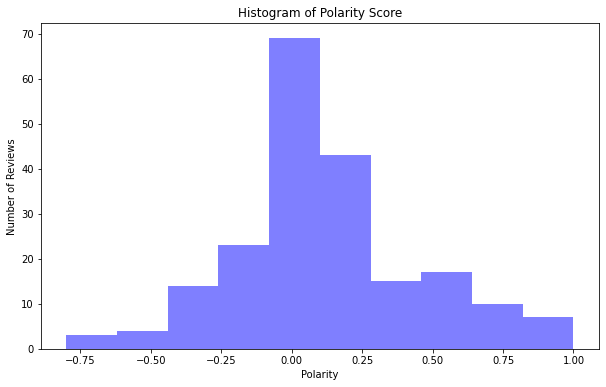

In [33]:
import matplotlib.pyplot as plt
num_bins = 10
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

In [34]:
mean1 = df['polarity'].mean()
print("Mean of Polarity: ", mean1)
median1 = df['polarity'].median()
print("Median of Polarity: ", median1)

Mean of Polarity:  0.11576948369852612
Median of Polarity:  0.05376456876456876


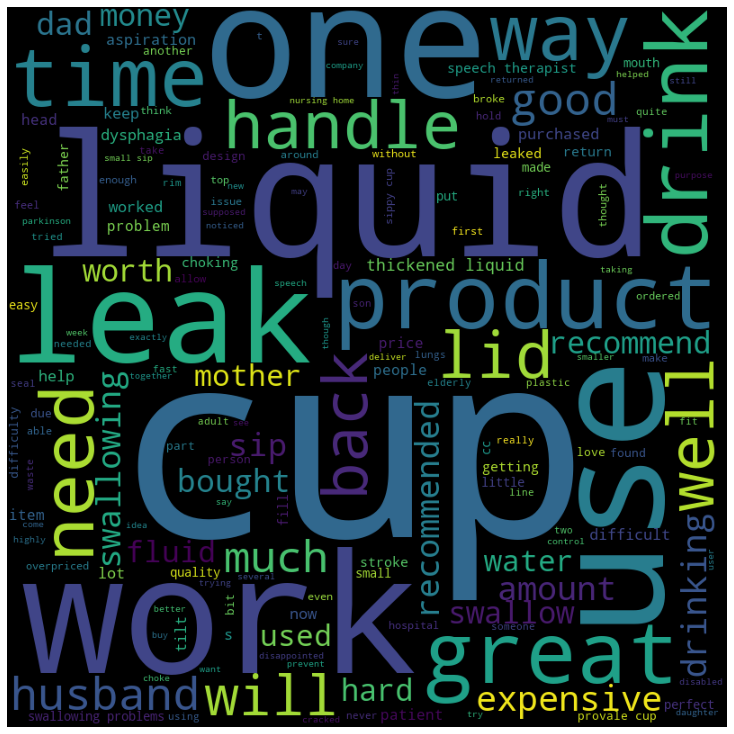

In [35]:

from wordcloud import WordCloud, STOPWORDS
stop_words = set(STOPWORDS)
comment_words = ""
for i in df.review: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

c:\users\jaeme\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

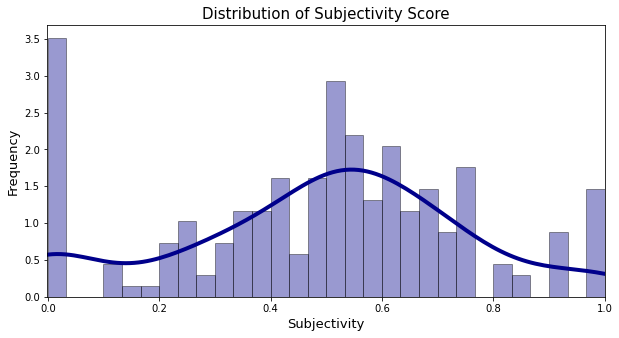

In [36]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)